# FAKE JOB POSTINGS


# Let's get started


In [ ]:
import numpy as np
import pandas as pa
import matplotlib.pyplot as plt
import seaborn as sns

We start by importing the tools seen in class



In [ ]:
fake = pa.read_csv('/content/drive/MyDrive/autres/fake_job_postings.csv')
fake.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


## Preprocessing data

We rename the file into an easy_to_understand title and get a preview of it. We notice a lot of empty/NaN cells. We check it.

In [ ]:
fake.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

We drop the categories with too many missing values, salary range and department. But we also drop the "text sentences" categories as we haven't seen in class how to handle it. 

In [ ]:
fake.drop(['salary_range'], axis=1,inplace=True)
fake.drop(['department'], axis=1,inplace=True)

fake.drop(['company_profile'], axis=1,inplace=True)
fake.drop(['requirements'], axis=1,inplace=True)
fake.drop(['description'], axis=1,inplace=True)
fake.drop(['benefits'], axis=1,inplace=True)
fake.drop(['industry'], axis=1,inplace=True)
fake.drop(['function'], axis=1,inplace=True)

We fill the categories with missing values using the "most common value is put" method. Very practical for textual values of only one word. We fill the missing values with the values that appear the more.

In [ ]:
fake.employment_type.fillna(fake.employment_type.mode()[0],inplace=True)
fake.required_experience.fillna(fake.required_experience.mode()[0],inplace=True)
fake.required_education.fillna(fake.required_education.mode()[0],inplace=True)
fake.location.fillna(fake.location.mode()[0],inplace=True)

fake.head()

,job_id,title,location,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,fraudulent
0,1,Marketing Intern,"US, NY, New York",0,1,0,Other,Internship,Bachelor's Degree,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",0,1,0,Full-time,Not Applicable,Bachelor's Degree,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,0
3,4,Account Executive - Washington DC,"US, DC, Washington",0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,0
4,5,Bill Review Manager,"US, FL, Fort Worth",0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,0


In [ ]:
fake.isnull().sum()

job_id                 0
title                  0
location               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
fraudulent             0
dtype: int64

No missing values left. Back to KNN

# K-nearest neighbors

In [ ]:
from sklearn.model_selection import train_test_split

X = pa.get_dummies(fake)
X.drop(['fraudulent'], axis=1,inplace=True) 
y = fake.fraudulent

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

We dfine X, the data used to determine if yes or no a job posting is fake. Answers are contained in y. get.dummies allows us to split out columns of categorical data into sets of boolean columns.
By default the test split is 25%.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.neighbors import KNeighborsClassifier

The main idea is to find the k value that gives us the best accuracy. Let's try with a small values, 3.

In [ ]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train) # knn.fit trains the model

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(X_test)
print(" {} knn score: {} ".format(3,knn.score(X_test,y_test)))

 3 knn score: 0.9680089485458613 


## Accuracy


We tested a random value. Now we're going to look for the best k value, to obtain the best accuracy, we will use different methods.
It is important to precise that the two following methods were not seen in class. I looked online and understood the codes and decided to add it as it good to test our model's accuracy.

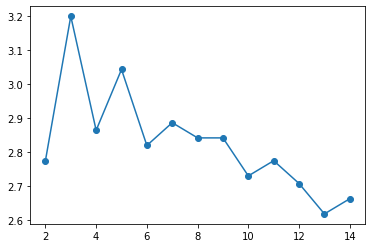

In [ ]:
errors = []
for k in range(2,15):
    knn = KNeighborsClassifier(n_neighbors=k)
    errors.append(100*(1 - knn.fit(X_train, y_train).score(X_test, y_test)))
plt.plot(range(2,15), errors, 'o-')
plt.show()

We try all the k values between 2 and 15 and print a diagram showing the number of errors depending on the k. 
It seems like 13 is a good value.


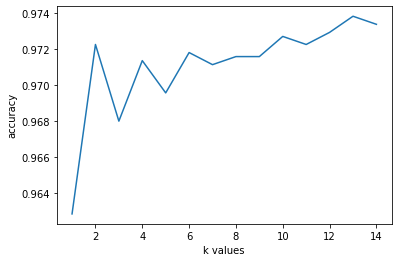

In [ ]:
score_list = []
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(X_train,y_train)
    score_list.append(knn2.score(X_test,y_test))
    
plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

Here, we test the accuracy level, as expected, k = 13 is the best value. High accuracy and lowest number of errors.

## Confusion matrix

As seen in class, we compute the confusion matrix to decide whether or not k = 13 is the best value.

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[4244   40]
 [ 103   83]]


In [ ]:
acc = np.sum(np.diag(cm))/np.sum(cm)
print('{:.2%}'.format(acc))

96.80%


In [ ]:
def best_model_search(X_train, X_test, y_train, y_test, n=15, patience=3):
    k = 1
    best_acc = 0
    best_model = None
    while k <n and patience >0 :
        knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        acc = np.sum(np.diag(cm))/np.sum(cm)
        print('{:.2%}'.format(acc))
        if acc > best_acc:
            best_acc = acc
            best_model = knn
        patience = patience -1
        k = k+1
    return best_model,k, best_acc

We look for the best model by using an algorithm

knn, k, acc = best_model_search(X_train, X_test, y_train, y_test, patience=15)

In [ ]:
print(k, '{:.2%}'.format(acc))

14 96.80%


With this method we obtain K = 14 as best accuracy K value

# Decision trees


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

We import the py librairiestexte

In [ ]:
fake = pd.read_csv('/content/drive/MyDrive/autres/fake_job_postings.csv')
fake.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

They are missing values in some columns.

In [ ]:
fake.dropna(how='all',inplace=True)
fake.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

We drop the category salary_range because they are too missing values.Same for department.

In [ ]:
fake.drop(['salary_range'], axis=1,inplace=True)
fake.drop(['department'], axis=1,inplace=True)
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   company_profile      14572 non-null  object
 4   description          17879 non-null  object
 5   requirements         15185 non-null  object
 6   benefits             10670 non-null  object
 7   telecommuting        17880 non-null  int64 
 8   has_company_logo     17880 non-null  int64 
 9   has_questions        17880 non-null  int64 
 10  employment_type      14409 non-null  object
 11  required_experience  10830 non-null  object
 12  required_education   9775 non-null   object
 13  industry             12977 non-null  object
 14  function             11425 non-null  object
 15  fraudulent           17880 non-null  int64 
dtypes: i

We also drop categories with sentences, because they will not be useful to our model.

In [ ]:
fake.drop(['description'], axis=1,inplace=True)
fake.drop(['company_profile'], axis=1,inplace=True)
fake.drop(['benefits'], axis=1,inplace=True)
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   requirements         15185 non-null  object
 4   telecommuting        17880 non-null  int64 
 5   has_company_logo     17880 non-null  int64 
 6   has_questions        17880 non-null  int64 
 7   employment_type      14409 non-null  object
 8   required_experience  10830 non-null  object
 9   required_education   9775 non-null   object
 10  industry             12977 non-null  object
 11  function             11425 non-null  object
 12  fraudulent           17880 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 1.8+ MB


We fill the categories with missing values using the "most common value is put" method. Very practical for textual values of only one word. We fill the missing values with the values that appear the more.

In [ ]:
fake.location.fillna(fake.location.mode()[0],inplace=True)
fake.requirements.fillna(fake.requirements.mode()[0],inplace=True)
fake.employment_type.fillna(fake.employment_type.mode()[0],inplace=True)
fake.required_experience.fillna(fake.required_experience.mode()[0],inplace=True)
fake.required_education.fillna(fake.required_education.mode()[0],inplace=True)
fake.industry.fillna(fake.industry.mode()[0],inplace=True)
fake.function.fillna(fake.function.mode()[0],inplace=True)
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17880 non-null  object
 3   requirements         17880 non-null  object
 4   telecommuting        17880 non-null  int64 
 5   has_company_logo     17880 non-null  int64 
 6   has_questions        17880 non-null  int64 
 7   employment_type      17880 non-null  object
 8   required_experience  17880 non-null  object
 9   required_education   17880 non-null  object
 10  industry             17880 non-null  object
 11  function             17880 non-null  object
 12  fraudulent           17880 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 1.8+ MB


## Actual algorithm

We define what are inputs (criterias) and outputs (fraudulent 1 = yes 0 = NO)

In [ ]:
inputs = fake.drop('fraudulent', axis = 'columns')
target = fake['fraudulent']
from sklearn.preprocessing import LabelEncoder

Then we convert our datas into numbers associated with each label, in order to use it in our model.

In [ ]:
le_job_id = LabelEncoder()
le_title = LabelEncoder()
le_location = LabelEncoder()
le_requirements = LabelEncoder()
le_telecommuting = LabelEncoder()
le_has_company_logo = LabelEncoder()
le_has_questions = LabelEncoder()
le_employment_type = LabelEncoder()
le_required_experience = LabelEncoder()
le_required_education = LabelEncoder()
le_industry = LabelEncoder()
le_function = LabelEncoder()

inputs['job_id_n'] = le_job_id.fit_transform(inputs['job_id'])
inputs['title_n'] = le_title.fit_transform(inputs['title'])
inputs['location_n'] = le_location.fit_transform(inputs['location'])
inputs['requirements_n'] = le_requirements.fit_transform(inputs['requirements'])
inputs['telecommuting_n'] = le_telecommuting.fit_transform(inputs['telecommuting'])
inputs['has_company_logo_n'] = le_has_company_logo.fit_transform(inputs['has_company_logo'])
inputs['has_questions_n'] = le_has_questions.fit_transform(inputs['has_questions'])
inputs['employment_type_n'] = le_employment_type.fit_transform(inputs['employment_type'])
inputs['required_experience_n'] = le_required_experience.fit_transform(inputs['required_experience'])
inputs['required_education_n'] = le_required_education.fit_transform(inputs['required_education'])
inputs['industry_n'] = le_industry.fit_transform(inputs['industry'])
inputs['function_n'] = le_function.fit_transform(inputs['function'])
fake.head()

,job_id,title,location,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Experience with content management systems a m...,0,1,0,Other,Internship,Bachelor's Degree,Information Technology and Services,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",What we expect from you:Your key responsibilit...,0,1,0,Full-time,Not Applicable,Bachelor's Degree,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Implement pre-commissioning and commissioning ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0
3,4,Account Executive - Washington DC,"US, DC, Washington","EDUCATION: Bachelor’s or Master’s in GIS, busi...",0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",QUALIFICATIONS:RN license in the State of Texa...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


We drop the previous datas and we keep the new ones (numbers).

In [ ]:
inputs_n = inputs.drop(['job_id', 'title', 'location', 'requirements', 'telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education', 'industry', 'function'], axis = 'columns')
inputs_n

,job_id_n,title_n,location_n,requirements_n,telecommuting_n,has_company_logo_n,has_questions_n,employment_type_n,required_experience_n,required_education_n,industry_n,function_n
0,0,6043,2535,3829,0,1,0,2,4,1,58,22
1,1,2183,1073,10526,0,1,0,1,6,1,75,7
2,2,1763,1867,4560,0,1,0,1,5,1,58,18
3,3,299,1703,3166,0,1,0,1,5,1,22,31
4,4,975,1741,6495,0,1,1,1,5,1,51,16
...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17875,268,166,9679,0,1,1,1,5,1,22,31
17876,17876,7101,2734,152,0,1,1,1,5,1,61,0
17877,17877,7579,2875,1789,0,0,0,1,5,1,58,18
17878,17878,4107,1045,443,0,0,1,0,6,6,48,9


We split our data set, our inputs into 2 subsets 30% for test and 70% for train our model.

In [ ]:
from sklearn.model_selection import train_test_split

inputs_n_train, inputs_n_test, target_train, target_test = train_test_split(inputs_n, target, test_size=.3, random_state=109)

We train our model with our 70% of our data set.

In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(inputs_n_train, target_train)

DecisionTreeClassifier()

We check the score, if our model is good we should obtain 1.

In [ ]:
model.score(inputs_n_train, target_train)

1.0

Our score is 1 so our model works.
Let us check a predection of our model by taking an example in our data set.

In [ ]:
model.predict([[4,975,1741,6495,0,1,1,1,5,1,51,16]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])

We can verify in an example that our model works, the prediction with the criterias of the 4th job gives us 0 a no fraudulent job.

We compute the prediction of our model.

In [ ]:
target_pred = model.predict(inputs_n_test) 
print(target_test.shape)
print(target_pred.shape)
target_pred

(5364,)
(5364,)


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(list(target_pred))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 

We compute the confusion matrix in order to compute the accuracy of our model

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(target_test, target_pred)
print(cm)

[[5033   86]
 [  68  177]]


We compute the accuracy of our model:

In [ ]:
acc = np.sum(np.diag(cm))/np.sum(cm)
print('{:.2%}'.format(acc))

97.13%


97% is a very good accuracy.

# Neural networks method using "Adam"

In [ ]:
import numpy as np
import pandas as pa

In [ ]:
fake = pa.read_csv('/content/drive/MyDrive/autres/fake_job_postings.csv')

In [ ]:
fake.drop(['salary_range'], axis=1,inplace=True)
fake.drop(['department'], axis=1,inplace=True)

fake.drop(['company_profile'], axis=1,inplace=True)
fake.drop(['requirements'], axis=1,inplace=True)
fake.drop(['description'], axis=1,inplace=True)
fake.drop(['benefits'], axis=1,inplace=True)
fake.drop(['industry'], axis=1,inplace=True)
fake.drop(['function'], axis=1,inplace=True)
fake.drop(['location'], axis=1,inplace=True)

As before, we do the preprocessing, i.e dropping the unusable categories.

In [ ]:
fake.employment_type.fillna(fake.employment_type.mode()[0],inplace=True)
fake.required_experience.fillna(fake.required_experience.mode()[0],inplace=True)
fake.required_education.fillna(fake.required_education.mode()[0],inplace=True)

fake.head()

,job_id,title,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,fraudulent
0,1,Marketing Intern,0,1,0,Other,Internship,Bachelor's Degree,0
1,2,Customer Service - Cloud Video Production,0,1,0,Full-time,Not Applicable,Bachelor's Degree,0
2,3,Commissioning Machinery Assistant (CMA),0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,0
3,4,Account Executive - Washington DC,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,0
4,5,Bill Review Manager,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,0


And fill the categories with the most common value.

In [ ]:
fake.isnull().sum()

job_id                 0
title                  0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
fraudulent             0
dtype: int64

No empty value left, we can start working

In [ ]:
from sklearn.model_selection import train_test_split

X = pa.get_dummies(fake)
y = fake.fraudulent

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

We use get.dummies as seen in K-NN, and we split the data in two categories.

In [ ]:
print('X_train shape: ',X_train.shape)
print('Y_train shape: ',y_train.shape)

X_train shape:  (13410, 11261)
Y_train shape:  (13410,)


In [ ]:
from keras.models import Sequential 
from keras.layers import Dense 
from tensorflow.keras.optimizers import Adam

We import the tools we will use, keras and tensorflow.

In [ ]:
import tensorflow
import keras

In [ ]:
y_train = tensorflow.keras.utils.to_categorical(y_train)
y_test = tensorflow.keras.utils.to_categorical(y_test)

In [ ]:

y_test.shape ;
y_train.shape 

(13410, 2)

We create a model with different layers.

In [ ]:
num_classes = y_train.shape[1]

def neural_network():
    model = Sequential()
    model.add(Dense(11261, input_dim=11261, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

- Sequential means that we are creating a model in a sequential way and the output of each layer will be used as input in the next layer we specify
- model.add will add a layer to the neural network. We need to specify the layer we want. Dense -> fully connected layer. 




In [ ]:
model = neural_network()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11261)             126821382 
                                                                 
 dense_1 (Dense)             (None, 2)                 22524     
                                                                 
Total params: 126,843,906
Trainable params: 126,843,906
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import warnings
warnings.filterwarnings("ignore")

model.fit(X_train, y_train,  epochs=1, batch_size=100) #95.84

scores = model.evaluate(X_test, y_test)
print("Neural network accuracy: %.2f%%" % (scores[1]*100))

140/140 [==============================] - 32s 228ms/step - loss: 175.3210 - accuracy: 0.9584
Neural network accuracy: 95.84%
